# Домашняя работа 3
## Вариант 4

### ПI.5.11. Постройте наилучшую среднеквадратическую линейную аппроксимацию для функции:
### Г) G(x) = sin(x)
### При x $\in$ $[0, \pi]$

Найдём функцию $f(x) = m \cdot x + p$, являющуюся элеметном наилучшего приближения sin(x) Поскольку все 3 функции $sin(x), x, 1 \in L_2[0, \pi]$, $m$ и $p$ можно найти из системы:

$M \left(\begin{array}{c} 
m\\
p
\end{array}\right) = \left(\begin{array}{c} 
(sinx, x)\\
(sinx, 1)
\end{array}\right) = B$,

Где $M$ - Матрица Грамма Получим её:

(x, x) = $\int_0^\pi x \cdot x dx = \frac{\pi^3}{3}$

(x, 1) = (1, x) = $\int_0^\pi x dx = \frac{\pi \pi}{2}$

(1, 1) = $\int_0^\pi dx = \pi$

(sinx, x) = $\int_0^\pi sinx \cdot x dx = \pi - \int_0^\pi cosx dx = \pi$

(sinx, 1) = $\int_0^\pi sinx dx = 2$

$M = \left(\begin{array}{cc}
        \frac{\pi^3}{3} & \frac{\pi \pi}{2} \\
        \frac{\pi \pi}{2} & \pi
         \end{array} \right)$

         
$M^{-1} = \left(\begin{array}{cc}
        \frac{12}{\pi^3} & \frac{-6}{\pi \pi} \\
        \frac{-6}{\pi \pi} & \frac{4}{\pi}
         \end{array} \right)$

$B = \left(\begin{array}{c}
                 \pi \\
                 2
                 \end{array} \right)$

$\left(\begin{array}{c} 
m\\
p
\end{array}\right) = M^{-1}B = \left( \begin{array}{c}
                                             0 \\
                                             \frac{2}{\pi}
                                             \end{array} \right)$

Приведём для наглядности график:

Text(0, 0.5, 'G(x)')

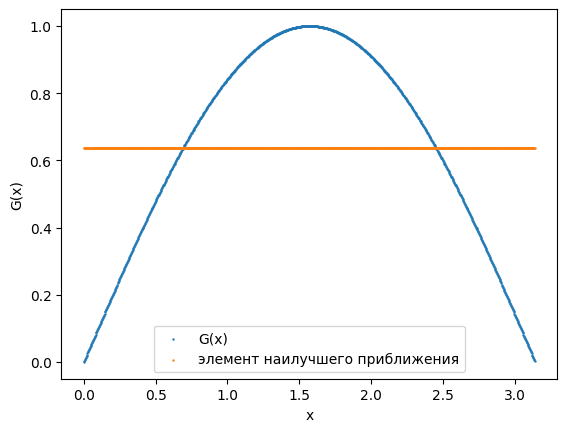

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
x = [0.001 * pi * i for i in range(1000)]
plt.scatter(
    x, np.sin(x), s = 0.5, label = "G(x)"
)
plt.scatter(
    x, [2 / pi] * len(x), s = 0.5, label = "элемент наилучшего приближения"
)
plt.xlabel('x')
plt.legend()
plt.ylabel('G(x)')